# Scalers in Preprocessing
The **sklearn.preprocessing** module includes 
1. scaling
2. centering
3. normalization : Normalize samples individually to unit norm.
4. binarization : set feature values to 0 or 1 according to a threshold
5. imputation methods : dealing with missing values

This workbook deals with the scaling. There are different scalers at work in Python :
a. StandardScaler
b. MinMaxScaler
c. RobustScaler

## Standard Scaler

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the data from the excel file. Use the "../" to navigate upwards in local folders
df = pd.read_excel('../../Data/non_scaled_data.xlsx')

The goal is to find a regression $y = w_1 \times a + w_2 \times b + w_3 \times c + w_0$<br>
The inputs are (at a first glance, normaly distributed) which allows us to the standard scaler where<br>
$(a_i,b_i,c_i) \rightarrow (\hat{a}_i,\hat{b}_i,\hat{c}_i)$
<br>
with
<br>
$\hat{a}_i = \frac{a_i-\overline{a}}{\sigma_a}$

In [3]:
df

,a,b,c,y
0,3.248691,4.632578,-14.657819,-315.468921
1,-1.223513,5.684509,-5.802131,-106.602682
2,-1.056344,3.943085,-9.161098,-195.476460
3,-2.145937,2.508340,-6.030558,-129.572568
4,1.730815,4.216731,0.131275,33.742494
...,...,...,...,...
9995,0.145917,2.170375,-1.550878,-20.060054
9996,0.978204,7.346647,-2.235902,-8.754531
9997,-2.028288,12.225301,-5.419191,-66.396299
9998,-0.125392,7.648357,-11.417673,-229.587330


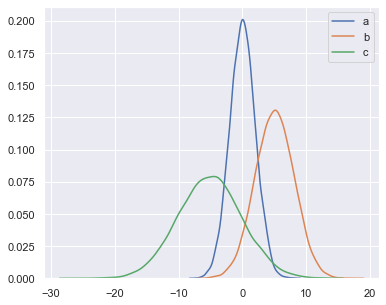

In [4]:
# Plot the distribution of the inputs with the method "kdeplot" of seaborn (sns)
fig, a = plt.subplots(1, 1, figsize=(6, 5))
sns.kdeplot(df['a'])
sns.kdeplot(df['b'])
sns.kdeplot(df['c']);


## Using Unscaled Data
Using a linear regression

In [5]:
# Import the linear regression class of sklearn
from sklearn.linear_model import LinearRegression

In [6]:
# Initialize the model with the argument fit_intercept = True to tell the model to also calculate the intercept
ols = LinearRegression(fit_intercept=True)
# Train the model using all the rows ":" of the columns a,b,c and using the column "y" as target
ols.fit(df.loc[:,['a','b','c']].values,df['y'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Print the values of the linear model
print('Coefficients:',np.round(ols.coef_,3))
print('Intercept (w0):',np.round(ols.intercept_,3))

Coefficients: [ 2.002  5.001 23.999]
Intercept (w0): 6.492


## Using Scaled Data

In [8]:
# Import the Standard Scaler from the module preprocessing
from sklearn.preprocessing import StandardScaler
# Initialize the scaler class
scaler = StandardScaler()
# Divide the data into predictors and target
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
# Scale the values of X
X_scaled = scaler.fit_transform(X)
# Save the scaled data frame
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

We will now visualise the resulting scaled data by printing its distribution

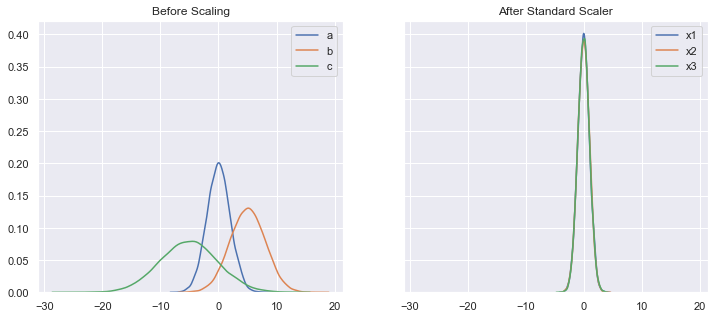

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True,sharex=True)
# print data previous to scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
# Print after-scaling data
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);

Now that our data is scaled, we will run the scaled data on it

In [10]:
# Initialize the model and train it on the scaled data
ols_scaled = LinearRegression(fit_intercept=True)
ols_scaled.fit(X_scaled,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('The coefficients are of course very different')
print('Coefficients',np.round(ols_scaled.coef_,3))
print('Intercept (w0)',np.round(ols_scaled.intercept_,3))

The coefficients are of course very different
Coefficients [  4.     15.02  119.509]
Intercept (w0) -90.07


## Forecasting
In this section we will exemlify the forcasting routines in python using our linear regression model

Imagine the following inputs :<br>
$(a,b,c)=(5,10,10)$
The prediction with the unscaled data :

In [12]:
# Print and predict
print('Prediction:',ols.predict(np.matrix([5,10,10]))[0])

Prediction: 306.5014804556281


In [13]:
# Scale the new inputs
print('Transformed Data:')
x_transformed = scaler.transform(np.matrix([5,10,10]))
print(x_transformed[0,:])

Transformed Data:
[2.49325454 1.65526269 3.02686509]


In [14]:
# predict on the scaled inputs
print('Prediction (with scaled data):',ols_scaled.predict(x_transformed)[0])

Prediction (with scaled data): 306.5014804556281


# MinMax Scaler

The **MinMaxScaler** is a popular scaling algorithm, and follows the following formula for each feature:
<br>
$\frac{xi–min(x)}{max(x)–min(x)}$<br>
It essentially shrinks the range such that the range is now between 0 and 1.
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. 



In [15]:
# Import the minmax scaler
from sklearn.preprocessing import MinMaxScaler
# initialize our new scaler
scaler = MinMaxScaler()
# dicide the data into predictor and target
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
# scale the data and store it in a dataframe
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

Compare the results Using the min-max scales by plotting the distributions

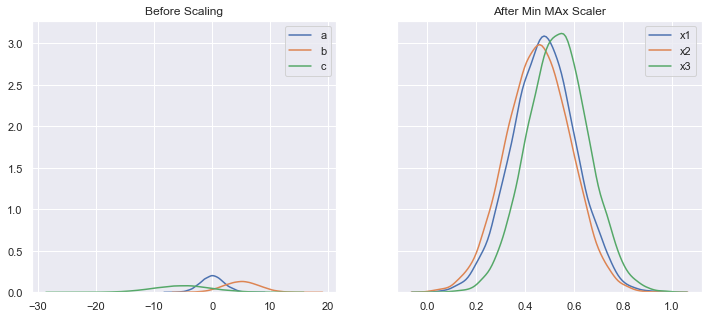

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True)
ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
ax2.set_title('After Min MAx Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);

# Robust Scaler

The **RobustScaler** uses a similar method to the Min-Max scaler but it instead uses the **interquartile** range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:
<br>
$\frac{xi–Q1(x)}{Q3(x)–Q1(x)}$
<br>
Where $Q1$ is the first quantile and $Q3$ is the third  quantile

In [17]:
# Import the robust scaler
from sklearn.preprocessing import RobustScaler
# Initialize this new scales
scaler = RobustScaler()
# divide the data into predictors and target
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
# scale and store the data
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

Now we plot the distribution with the min-max scaler to analyse the changes

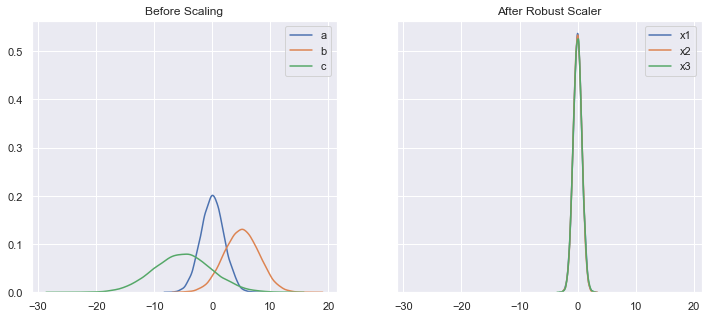

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True,sharex=True)
ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);